In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("MP2_Data.csv")
#Read the dataset

In [4]:
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [6]:
#Drop any null values and ID, and Week1_Stat1 since all values are 0
df.isnull().sum()
df=df.drop_duplicates()
df=df.drop(columns = "Week1_Stat1")
df=df.drop(columns = "ID")

<Axes: >

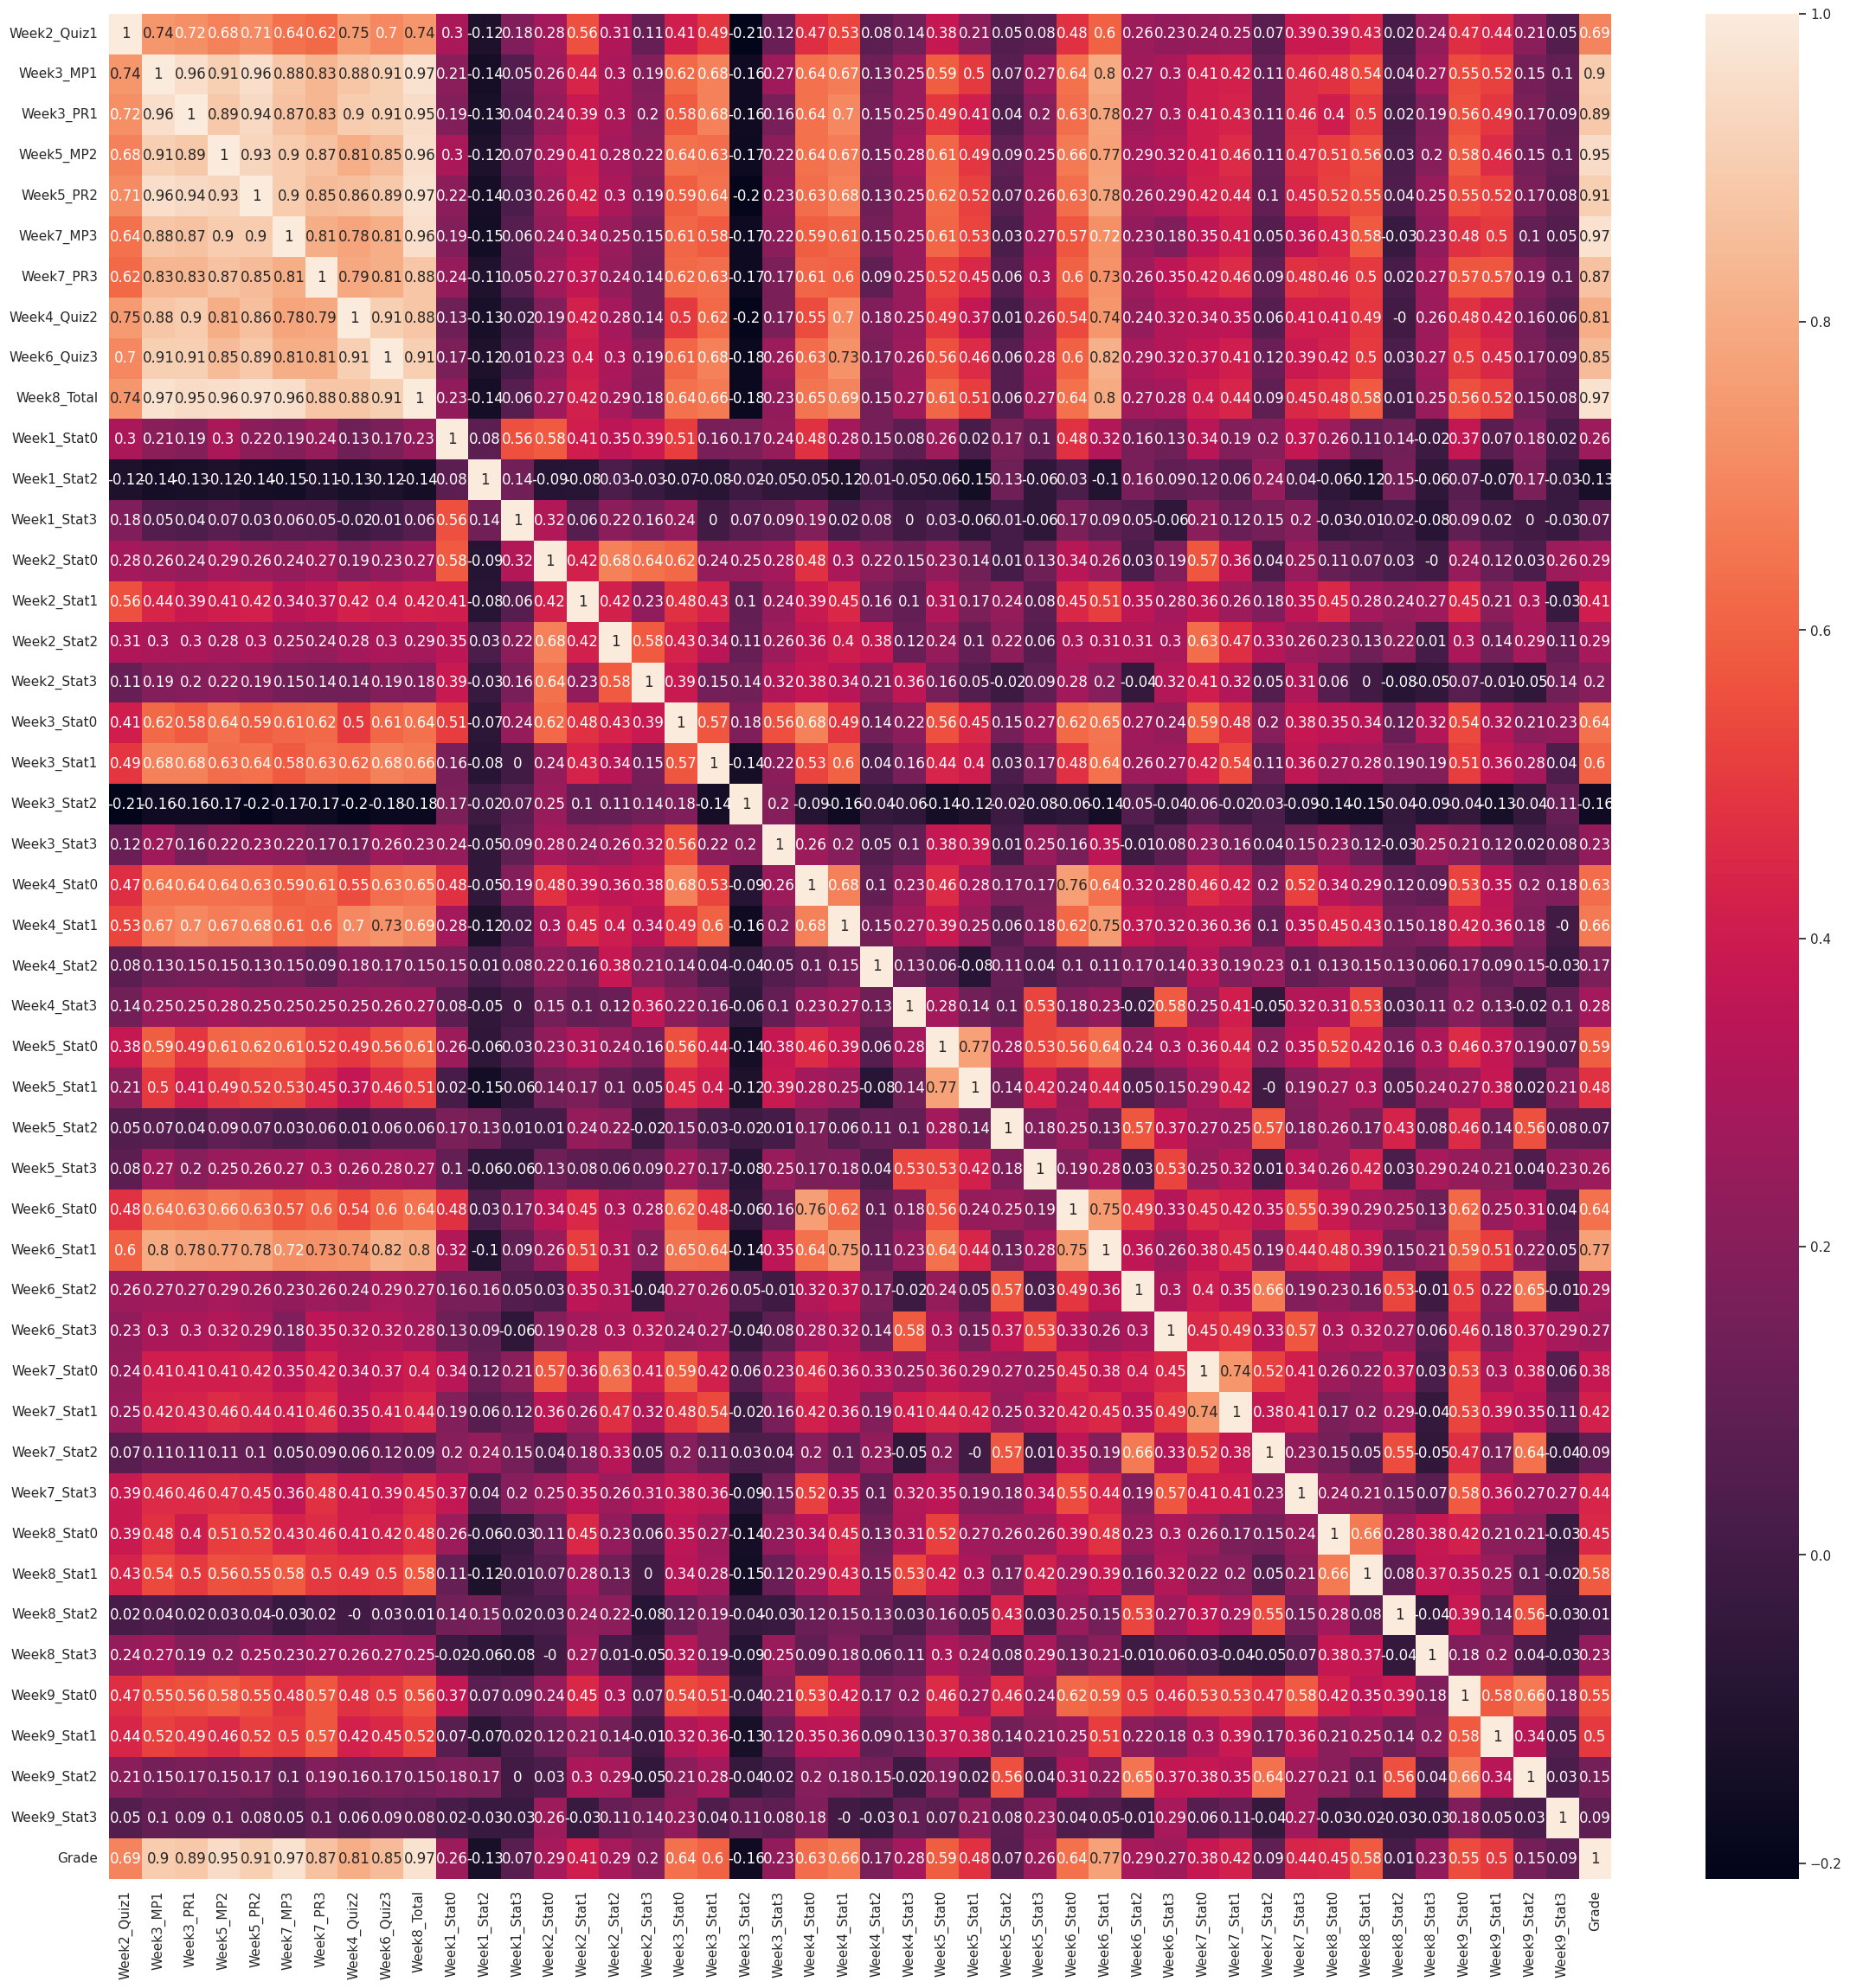

In [7]:
#visualisation of the correlation between values
sns.set(rc={'figure.figsize':(28,28)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

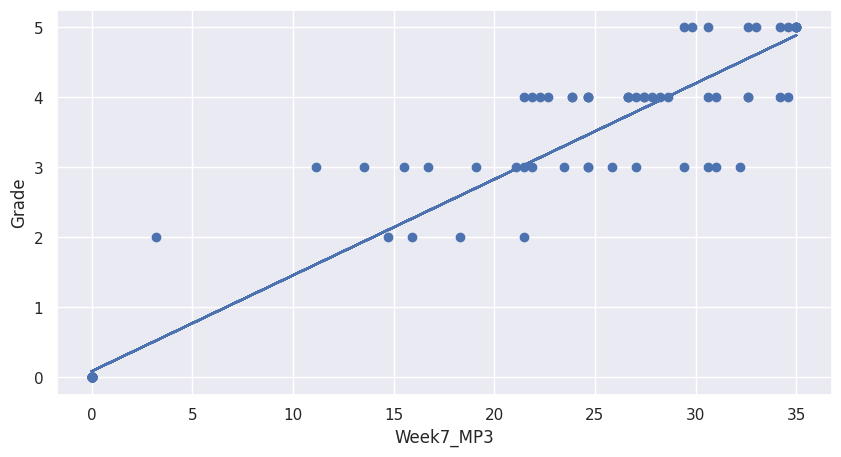

In [8]:
#Comparing Mini project 3 results to final grade as these two had the closest correlation
plt.figure(figsize=(10, 5))

features = ['Week7_MP3']
target = df['Grade']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel('Grade')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

In [9]:
X = df.iloc[:, :-1]
Y = df['Grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)

#Divide the data into 75% training data and 25% test data

(80, 45)
(27, 45)


In [11]:
#Linear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.17713806945346908
R2 score is 0.9924478758919149


The model performance for testing set
--------------------------------------
RMSE is 0.7498740529235217
R2 score is 0.8293402213006851


In [12]:
#Results from training

pred = []
for i in y_test_predict:
  x = round(round(i * 2) / 2)
  pred.append(x)
print(pred)

[0, 0, 0, 0, 4, 2, 2, 3, 0, 4, 4, 4, 5, 0, 4, 2, 4, 4, 0, 0, 2, 0, 4, 0, 2, 0, 0]


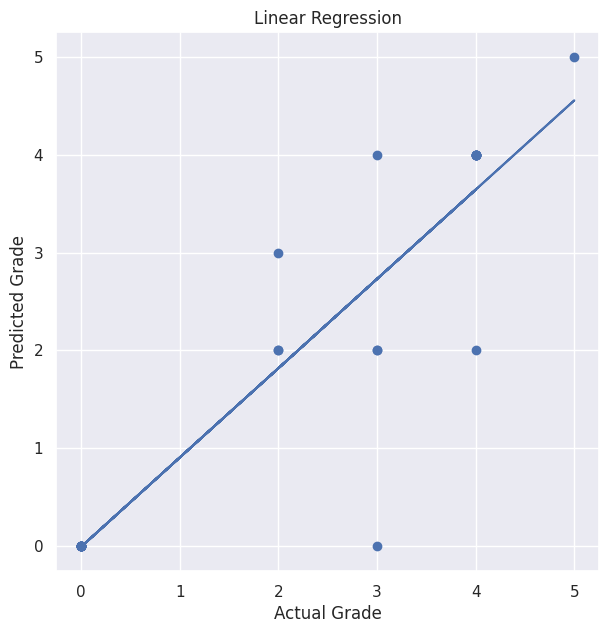

In [13]:
#Graph of results

sns.set(rc={"figure.figsize":(7, 7)})
plt.scatter(Y_test, pred)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Linear Regression")
z = np.polyfit(Y_test, pred, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(Y_test, p(Y_test))

plt.show()

In [14]:
#Ridge regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = Y_train.ravel(), cv = 10)

y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(Y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(Y_test, y_pred_ridge_test)

rmse_ridge_train = (np.sqrt(mean_squared_error(Y_train, y_pred_ridge_train)))
rmse_ridge_test = (np.sqrt(mean_squared_error(Y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('R2_score train: ', r2_score_ridge_train)
print('R2_score test: ', r2_score_ridge_test)
print("RMSE train: ", rmse_ridge_train)
print("RMSE test: ", rmse_ridge_test)

CV:  -0.018017200904493248
R2_score train:  0.9999418657835522
R2_score test:  0.12390166269932856
RMSE train:  0.01554151169833225
RMSE test:  1.6990226377101616


In [15]:
#Results from training

pred = []
for i in y_pred_ridge_test:
  x = round(round(i * 2) / 2)
  pred.append(x)

print(pred)

[-2, 0, 0, 0, 4, 2, 2, 4, 2, 4, 3, 4, 5, 0, 3, 4, 3, 3, 7, 0, 3, 8, 5, 0, 2, 0, 0]


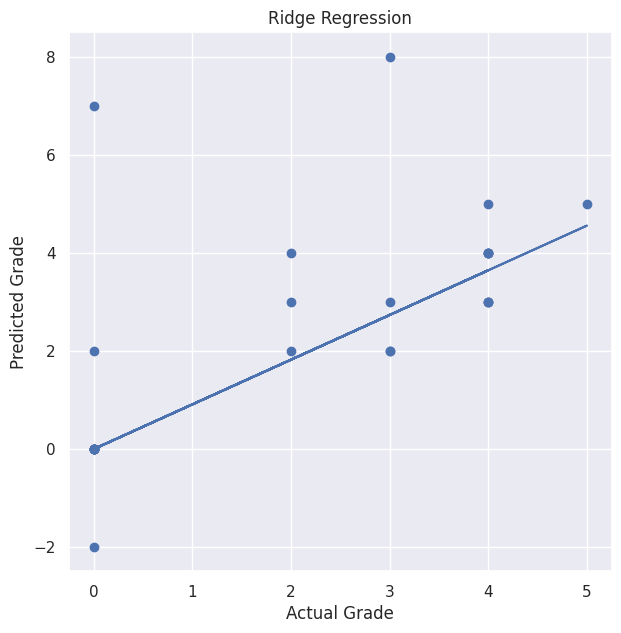

In [16]:
#Graph of results

sns.set(rc={"figure.figsize":(7, 7)})
plt.scatter(Y_test, pred)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Ridge Regression")

#add trendline to plot
plt.plot(Y_test, p(Y_test))

plt.show()